## Dissipative Atom-Cavity system

### setup of a simple atom cavity model

- define operators for the system Hamiltonian - JC Hamiltonian - assuming resonance
- define Master equation which descibes the time evolution
- leaky cavity (no loss directly from the atom into the environment)

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import (about, basis, brmesolve, destroy, identity, ket2dm, mesolve,
                   plot_energy_levels, plot_expectation_values, tensor)

In [19]:
N = 10  # num. cavity modes
w0 = 1.0 * 2 * np.pi
g = 0.1 * 2 * np.pi # weak couling 
kappa = 0.05
gamma = 0.05


# operators
a = tensor(destroy(N), identity(2)) #a.dag()
sm = tensor(identity(N), destroy(2))
c_ops = [np.sqrt(kappa) * a] #collapse operators
e_ops = [a.dag() * a, sm.dag() * sm] #expectation values

#Hamiltonian
H = w0*a.dag()*a + w0*sm.dag()*sm + g*(a.dag() + a)*(sm + sm.dag())

#initial state
psi0 = ket2dm(tensor(basis(N,1), basis(2,0)))


c:\Users\SophiaCarmenSimon\dissipativeAtomCavity\.venv\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


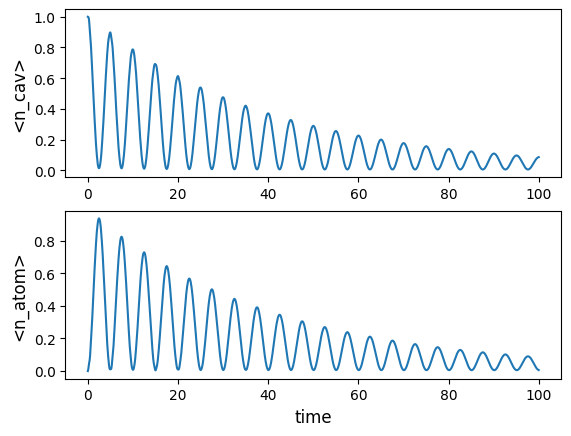

In [20]:
#solving the dynamics using mesolve()
times = np.linspace(0, 10 * 2 * np.pi / g, 1000)
result = mesolve(H, psi0, times, c_ops, e_ops)

fig, axes = plot_expectation_values(
    [result], ylabels=["<n_cav>", "<n_atom>"]
)


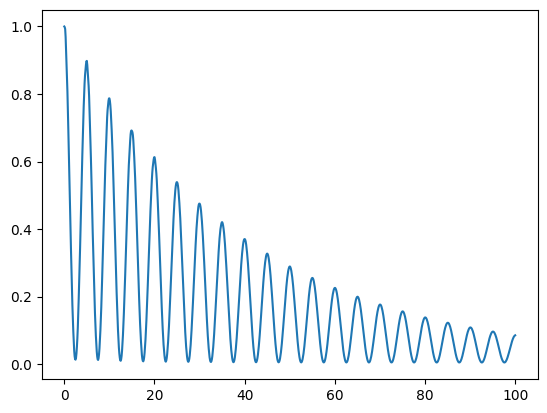

In [21]:
#using matplotlib to plot the same

#expectation values of cavity:
y_cav = result.expect[0]
y_atom = result.expect[1]
x = result.times

plt.plot(x, y_cav)

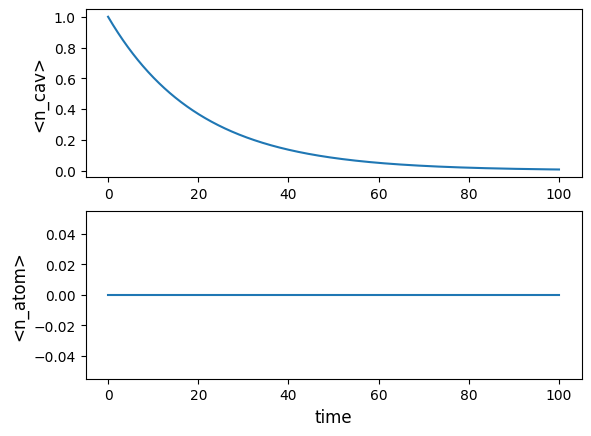

In [22]:
#try without coupling 
H_0 = w0*a.dag()*a + w0*sm.dag()*sm 


times = np.linspace(0, 10 * 2 * np.pi / g, 1000)
result = mesolve(H_0, psi0, times, c_ops, e_ops)

fig, axes = plot_expectation_values(
    [result], ylabels=["<n_cav>", "<n_atom>"]
)


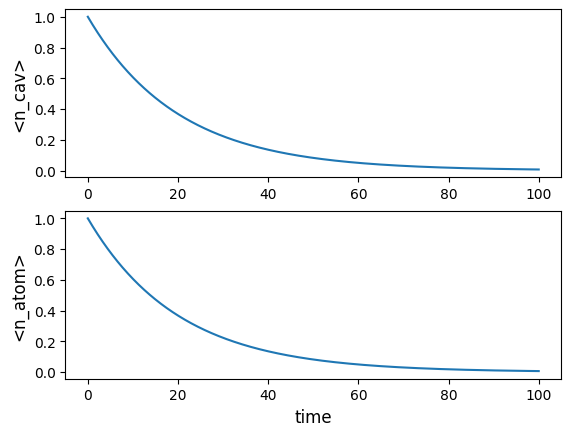

In [23]:
#start with ket(1,1) and add atomic decay
c_ops_dec = [np.sqrt(kappa) * a, np.sqrt(gamma) * sm]

psi11 = ket2dm(tensor(basis(N,1), basis(2,1)))
H_0 = w0*a.dag()*a + w0*sm.dag()*sm 



times = np.linspace(0, 10 * 2 * np.pi / g, 1000)
result = mesolve(H_0, psi11, times, c_ops_dec, e_ops)

fig, axes = plot_expectation_values(
    [result], ylabels=["<n_cav>", "<n_atom>"]
)


c:\Users\SophiaCarmenSimon\dissipativeAtomCavity\.venv\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


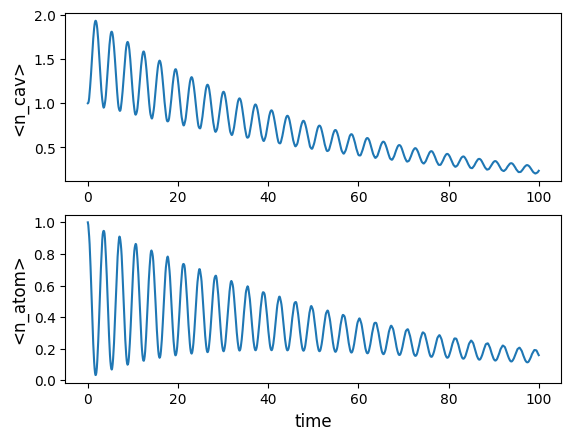

In [24]:
#only decay, no leaking cavity and coupling

c_ops_dec_only = [np.sqrt(gamma) * sm]

psi11 = ket2dm(tensor(basis(N,1), basis(2,1)))


times = np.linspace(0, 10 * 2 * np.pi / g, 1000)
result = mesolve(H, psi11, times, c_ops_dec_only, e_ops)

fig, axes = plot_expectation_values(
    [result], ylabels=["<n_cav>", "<n_atom>"]
)

### ideas
- interactive parameters
- animate over time and changeable parameters and initial values